<a href="https://colab.research.google.com/github/MelissaMatindi/mastering-AI-toolkit/blob/main/03_Amazon_Reviews_NER_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Amazon_Reviews_NER_Sentiment**
## **NLP with spaCy**

In [1]:
# Install & setup
!pip install spacy pandas -q
!python -m spacy download en_core_web_sm -q
import spacy, pandas as pd
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 138.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
# Install kaggle CLI
!pip install -q kaggle

# Upload kaggle.json
from google.colab import files
files.upload()

# Move credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [6]:
# Load dataset directly from Kaggle
data = "bittlingmayer/amazonreviews"
# Download & unzip
!kaggle datasets download -d {data} --unzip
# List files
!ls -lh

Dataset URL: https://www.kaggle.com/datasets/bittlingmayer/amazonreviews
License(s): unknown
 95% 469M/493M [00:01<00:00, 329MB/s]
100% 493M/493M [00:01<00:00, 397MB/s]
total 889M
-rw-r--r-- 1 root root  47M Nov  3 07:38 1429_1.csv
-rw-r--r-- 1 root root  95M Nov  3 07:38 Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv
-rw-r--r-- 1 root root 254M Nov  3 07:38 Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv
-rw-r--r-- 1 root root   72 Nov  3 07:35 kaggle.json
drwxr-xr-x 1 root root 4.0K Oct 30 13:36 sample_data
-rw-r--r-- 1 root root  51M Nov  3 07:39 test.ft.txt.bz2
-rw-r--r-- 1 root root 443M Nov  3 07:40 train.ft.txt.bz2


In [7]:
# Load into pandas
import pandas as pd
df = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
df = df[['reviews.text']].dropna().rename(columns={'reviews.text': 'reviewText'}).head(100)
df = df.reset_index(drop=True)

print(f"Loaded {len(df)} reviews")
df.head()

Loaded 100 reviews


,reviewText
0,I thought it would be as big as small paper bu...
1,This kindle is light and easy to use especiall...
2,Didnt know how much i'd use a kindle so went f...
3,I am 100 happy with my purchase. I caught it o...
4,Solid entry level Kindle. Great for kids. Gift...


In [8]:
# NER: Extract PRODUCT & brands
import spacy
nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(text)
    products = [ent.text for ent in doc.ents if ent.label_ == "PRODUCT"]
    brands   = [ent.text for ent in doc.ents if ent.label_ in ("ORG", "PRODUCT")]
    return list(set(products)), list(set(brands))

df[['Products', 'Brands']] = df['reviewText'].apply(
    lambda x: pd.Series(extract_entities(x))
)

In [9]:
# Rule-based sentiment
positive = {"great","love","excellent","perfect","awesome","amazing","best","good","happy","fast"}
negative = {"bad","worst","hate","terrible","disappoint","broken","slow","poor","return"}

def rule_sentiment(text):
    words = set(text.lower().split())
    if words & positive: return "Positive"
    if words & negative: return "Negative"
    return "Neutral"

df['Sentiment'] = df['reviewText'].apply(rule_sentiment)

In [10]:
# Screenshot table + stats
from IPython.display import display
display(df[['reviewText','Products','Brands','Sentiment']].head(10))

print("\nSentiment counts")
print(df['Sentiment'].value_counts())

,reviewText,Products,Brands,Sentiment
0,I thought it would be as big as small paper bu...,[],[],Neutral
1,This kindle is light and easy to use especiall...,[],[],Neutral
2,Didnt know how much i'd use a kindle so went f...,[],[],Positive
3,I am 100 happy with my purchase. I caught it o...,[],[],Positive
4,Solid entry level Kindle. Great for kids. Gift...,[iPads],[iPads],Positive
5,This make an excellent ebook reader. Don't exp...,[],[],Positive
6,"I ordered this for my daughter, as I have the ...",[],"[E-Readers, Amazon.com]",Positive
7,I bought my Kindle about 2 months ago and the ...,[],[],Neutral
8,"amazon kindle is always the best ebook, upgrad...",[],[],Positive
9,"It's beyond my expectation, and it can even sh...",[],[],Positive



Sentiment counts
Sentiment
Positive    58
Neutral     42
Name: count, dtype: int64


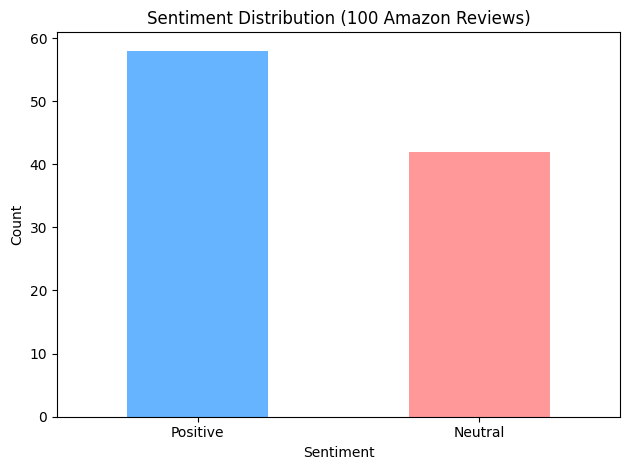

In [11]:
# Bonus chart
import matplotlib.pyplot as plt
df['Sentiment'].value_counts().plot(kind='bar', color=['#66b3ff','#ff9999'])
plt.title("Sentiment Distribution (100 Amazon Reviews)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("sentiment_bar.png", dpi=200)
plt.show()